**Подключение библиотек и скриптов**

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

**Подключение к Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Задание текущей директории через константу

In [0]:
# GDRIVE_PATH = ''
GDRIVE_PATH = '/content/drive/My Drive/'
os.chdir(GDRIVE_PATH)

### Создание «сырых» датасетов

**Загрузка содержимого скрипта**

In [0]:
from build_dataset import *

**Задание параметров функции создания датасетов**

In [0]:
# Следует из исходных данных
CHURNED_START_DATE = '2019-09-01' 
CHURNED_END_DATE = '2019-10-01'

INTER_1 = (1, 7)
INTER_2 = (8, 14)
INTER_3 = (15, 21)
INTER_4 = (22, 28)
INTER_LIST = [INTER_1, INTER_2, INTER_3, INTER_4]

**Создание «сырого» датасета для обучения**

In [0]:
build_dataset_raw(churned_start_date=CHURNED_START_DATE,
                  churned_end_date=CHURNED_END_DATE,
                  inter_list=INTER_LIST,
                  raw_data_path='train/',
                  dataset_path='dataset/',
                  gdrive_path=GDRIVE_PATH,                  
                  mode='train')

Run time (reading csv files): 0:02:04.951081
NO dealing with outliers, missing values and categorical features...
Creating dataset...
Processing with features: ['trans_amt', 'pay_amt']
Run time (calculating features): 0:02:29.376694
Processing with features: ['reports_amt']
Run time (calculating features): 0:04:01.824472
Processing with features: ['sess_with_abusers_amt']
Run time (calculating features): 0:08:30.107557
Processing with features: ['session_amt', 'disconnect_amt']
Run time (calculating features): 0:13:45.098865
Processing with features: ['avg_min_ping']
Run time (calculating features): 0:18:54.084105
Processing with features: ['session_player', 'leavings_rate', 'win_rate', 'kd']
Run time (calculating features): 0:24:07.062531
Processing with features: ['silver_spent', 'gold_spent']
Run time (calculating features): 0:29:36.238980
Dataset is successfully built and saved to dataset/, run time "build_dataset_raw": 0:30:02.881139


**Создание «сырого» датасета для теста**

In [0]:
build_dataset_raw(churned_start_date=CHURNED_START_DATE,
                  churned_end_date=CHURNED_END_DATE,
                  inter_list=INTER_LIST,
                  raw_data_path='test/',
                  dataset_path='dataset/',
                  gdrive_path=GDRIVE_PATH,
                  mode='test')

Run time (reading csv files): 0:00:15.193157
NO dealing with outliers, missing values and categorical features...
Creating dataset...
Processing with features: ['trans_amt', 'pay_amt']
Run time (calculating features): 0:00:17.375591
Processing with features: ['reports_amt']
Run time (calculating features): 0:00:25.588900
Processing with features: ['sess_with_abusers_amt']
Run time (calculating features): 0:00:50.332258
Processing with features: ['session_amt', 'disconnect_amt']
Run time (calculating features): 0:01:20.232832
Processing with features: ['avg_min_ping']
Run time (calculating features): 0:01:50.422345
Processing with features: ['session_player', 'leavings_rate', 'win_rate', 'kd']
Run time (calculating features): 0:02:19.925212
Processing with features: ['silver_spent', 'gold_spent']
Run time (calculating features): 0:02:50.653171
Dataset is successfully built and saved to dataset/, run time "build_dataset_raw": 0:02:53.507364


In [0]:
train = pd.read_csv(GDRIVE_PATH + 'dataset/dataset_raw_train.csv', sep=';')
test = pd.read_csv(GDRIVE_PATH + 'dataset/dataset_raw_test.csv', sep=';')
print(train.shape, test.shape)

(469475, 62) (44764, 61)


**Проверка датасета для обучения**

In [0]:
train.head()

,user_id,is_churned,level,donate_total,trans_amt_1,trans_amt_2,trans_amt_3,trans_amt_4,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,reports_amt_1,reports_amt_2,reports_amt_3,reports_amt_4,sess_with_abusers_amt_1,sess_with_abusers_amt_2,sess_with_abusers_amt_3,sess_with_abusers_amt_4,session_amt_1,session_amt_2,session_amt_3,session_amt_4,disconnect_amt_1,disconnect_amt_2,disconnect_amt_3,disconnect_amt_4,avg_min_ping_1,avg_min_ping_2,avg_min_ping_3,avg_min_ping_4,session_player_1,session_player_2,session_player_3,session_player_4,leavings_rate_1,leavings_rate_2,leavings_rate_3,leavings_rate_4,win_rate_1,win_rate_2,win_rate_3,win_rate_4,kd_1,kd_2,kd_3,kd_4,silver_spent_1,silver_spent_2,silver_spent_3,silver_spent_4,gold_spent_1,gold_spent_2,gold_spent_3,gold_spent_4,age,gender,days_between_reg_fl,days_between_fl_df,has_return_date,has_phone_number
0,1e7edd8347e3aaeedf8c494b11240851e3fa0ad231b8f8...,0,43,88730.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,6.5,1.000000,6.000000,1.0,2.000000,1.000000,0.500000,0.000000,0.000000,0.0,0.500000,54.000000,31.000000,42.000000,28.000000,1321.000000,8592.000000,1352.333333,7941.500000,0.000000,0.216667,0.000000,0.166667,3.000000,0.659091,1.000000,0.650000,2.000000,2.387302,1.034877,0.952632,0.000000,40900.0,300.000000,25000.000000,0.000000,0.0,78.666667,0.000000,26.0,M,0,7,1,1
1,f43cac5f14e06ca039b173e14c323ac0c1fd8492f0cf08...,0,50,44149.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,3.600000,4.8,4.666667,4.000000,1.4,1.500000,2.200000,1.428571,0.000000,0.250000,0.0,0.142857,65.666666,46.000000,48.333334,70.571429,4685.000000,5632.600000,5526.833333,5444.000000,0.018182,0.013333,0.000000,0.035714,1.123333,1.678571,2.125631,1.661905,1.375780,1.247101,1.262016,1.432277,0.000000,41480.0,6266.666667,1400.000000,0.000000,0.0,0.000000,0.000000,27.0,M,0,37,1,1
2,cc7450e0b182947998534ef137b05e07109c100aced0b6...,0,37,44931.00000,1.0,1.0,NaN,2.0,63.000000,350.0,NaN,130.0,1.0,1.0,1.0,2.0,4.166667,8.2,8.000000,8.571429,1.0,1.857143,1.714286,1.857143,0.857143,0.857143,1.0,1.142857,60.972222,49.161904,63.061508,63.773809,4710.166667,6543.400000,6317.000000,7550.571429,0.066667,0.096667,0.064935,0.077063,0.684722,0.653571,0.291667,0.518254,1.075181,1.364430,0.872192,0.938326,14471.428571,31400.0,5714.285714,414.285714,104.285714,0.0,1.428571,2.857143,21.0,M,0,153,1,1
3,5c583d57a1e9e53341fc239d41fb6983e667a04b1b4d94...,0,20,37538.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,M,0,156,1,1
4,9bbaa1a2501e8dc83cf6c0c54ef139c75c99de09dcf4dc...,0,10,4100.97998,1.0,NaN,NaN,NaN,66.580002,NaN,NaN,NaN,NaN,NaN,2.0,NaN,4.250000,2.0,4.000000,1.400000,0.6,1.500000,1.500000,1.500000,0.800000,0.250000,0.5,0.250000,24.900000,24.500000,24.833333,24.733333,4124.400000,2755.833333,3776.800000,1949.000000,0.050000,0.305556,0.054286,0.111111,1.113333,0.733333,1.316667,1.000000,9.825229,10.025196,3.536477,10.131818,0.000000,0.0,1666.666667,9838.000000,0.000000,0.0,0.000000,0.000000,2.0,M,0,21,1,1


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469475 entries, 0 to 469474
Data columns (total 62 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   user_id                  469475 non-null  object 
 1   is_churned               469475 non-null  int64  
 2   level                    469475 non-null  int64  
 3   donate_total             469475 non-null  float64
 4   trans_amt_1              67485 non-null   float64
 5   trans_amt_2              60928 non-null   float64
 6   trans_amt_3              56720 non-null   float64
 7   trans_amt_4              57896 non-null   float64
 8   pay_amt_1                67485 non-null   float64
 9   pay_amt_2                60928 non-null   float64
 10  pay_amt_3                56720 non-null   float64
 11  pay_amt_4                57896 non-null   float64
 12  reports_amt_1            144916 non-null  float64
 13  reports_amt_2            145909 non-null  float64
 14  repo

### Обработка «сырых» датасетов

**Загрузка содержимого скрипта**

In [0]:
from prepare_dataset import *

**Примеры работы функции *prepare_dataset* на «сырых» датасетах для обучения и теста**

In [0]:
prepare_dataset(train, dataset_type='train', inter_list=INTER_LIST, gdrive_path=GDRIVE_PATH)
prepare_dataset(test, dataset_type='test', inter_list=INTER_LIST, gdrive_path=GDRIVE_PATH)


TRAIN
Dealing with missing values, outliers, categorical features...
Dataset is successfully prepared and saved to dataset/, run time (dealing with bad values): 0:00:29.498037

TEST
Dealing with missing values, outliers, categorical features...
Dataset is successfully prepared and saved to dataset/, run time (dealing with bad values): 0:00:03.368996


**Проверка датасета для обучения**

In [0]:
train_new = pd.read_csv(GDRIVE_PATH + 'dataset/dataset_train.csv', sep=';')
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469475 entries, 0 to 469474
Data columns (total 62 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   user_id                  469475 non-null  object 
 1   is_churned               469475 non-null  int64  
 2   level                    469475 non-null  int64  
 3   donate_total             469475 non-null  float64
 4   trans_amt_1              469475 non-null  float64
 5   trans_amt_2              469475 non-null  float64
 6   trans_amt_3              469475 non-null  float64
 7   trans_amt_4              469475 non-null  float64
 8   pay_amt_1                469475 non-null  float64
 9   pay_amt_2                469475 non-null  float64
 10  pay_amt_3                469475 non-null  float64
 11  pay_amt_4                469475 non-null  float64
 12  reports_amt_1            469475 non-null  float64
 13  reports_amt_2            469475 non-null  float64
 14  repo

In [0]:
train_new['is_churned'].value_counts()

0    455650
1     13825
Name: is_churned, dtype: int64

### Обучение объекта класса *WOETransformer* (Weight of Evidence) и логистической регресии

**Загрузка «сырого» датасета для обучения и формирование из него данных**

In [0]:
dataset_raw_train = pd.read_csv(GDRIVE_PATH + 'dataset/dataset_raw_train.csv', sep=';')
X_raw = dataset_raw_train.drop(['user_id', 'is_churned'], axis=1)
y_raw = dataset_raw_train['is_churned']

**Загрузка содержимого скрипта**

In [0]:
from train_model import *

**Описание работы функции *train_model*:**
 - Разбиение данных ($X$ и $y$) на обучающую и валидационную выборки;
 - Создание объекта класса *WOETransformer*;
 - Обучение этого объекта на обучающей выборки с её преобразованием;
 - Обучение логистической регрессии (*LogisticRegressionCV*) на преобразованной обучающей выборке - с подбором регуляризующего коэффициента на 5 фолдах и с максимизацией метрики $F_{1}$;
 - Преобразование валидационной выборки обученным объектом класса *WOETransformer*;
 - Получение предсказаний на преобразованной валидационной выборке и расчет метрик;
 - Визуализация калибровки порога вероятностей функцией из одного из предыдущих курсов;
 - Ввод значения порога вероятности, исходя из анализа графиков (в данном случае $0.8$);
 - Вывод метрик целевого класса с учетом введенного порога;
 - Сохранение в pickle-файлы значения порога и обученных объектов *WOETransformer* и *LogisticRegressionCV*.

Splitting data on train and valid: 0:00:00.409396
Train WOE transformation...
Run time (calculating IV): 0:00:31.554677
Run time (gathering WOE by vars): 0:00:31.750264
Run time (encoding vars with WOE): 0:08:01.927882
Run time (oversampling with SMOTE): 0:00:05.424756
Fitting LogisticRegressionCV...
Run time (fitting and CV model): 0:12:20.707795
Valid WOE transformation...
Run time (encoding vars with WOE): 0:00:51.344701

VALID METRICS

Precision: 0.18597382301230708
Recall: 0.6883586406362979
F1: 0.29283297446939405
Log Loss: 0.25429515741617287
ROC AUC: 0.8970184187781609




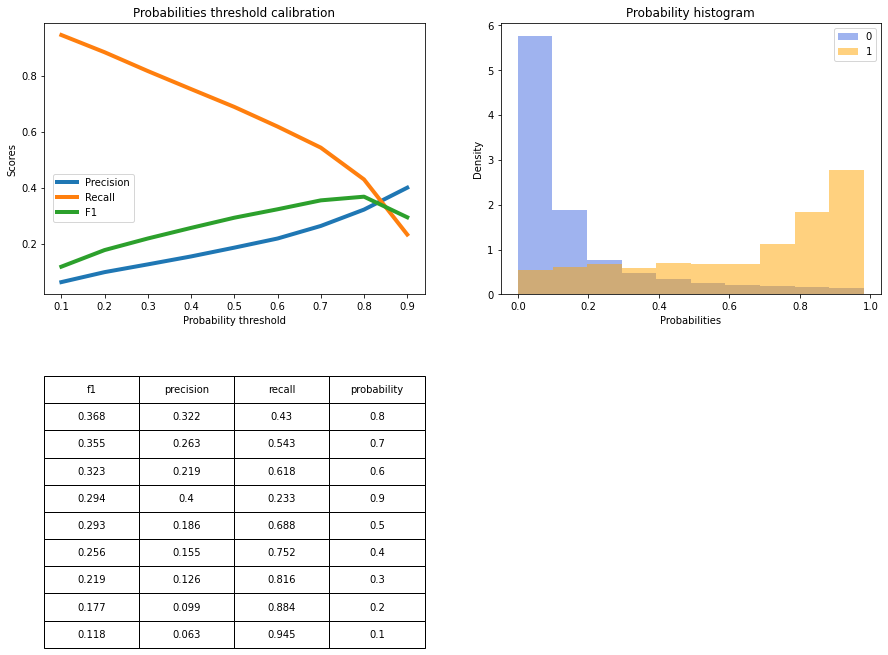

Threshold value: 0.8

CLASSIFICATION REPORT WITH THRESHOLD

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     45565
           1       0.32      0.43      0.37      1383

    accuracy                           0.96     46948
   macro avg       0.65      0.70      0.67     46948
weighted avg       0.96      0.96      0.96     46948

Run time (saving logit, woe_transformer and threshold): 0:14:10.703213


In [0]:
train_model(X_raw, y_raw, random_state=42, gdrive_path=GDRIVE_PATH)

### Ответ на «сыром» датасете для теста

**Загрузка «сырого» датасета для теста и формирование из него данных**

In [0]:
dataset_raw_test = pd.read_csv(GDRIVE_PATH + 'dataset/dataset_raw_test.csv', sep=';')
X_test = dataset_raw_test.drop(['user_id'], axis=1)

**Загрузка содержимого скрипта**

In [0]:
from make_prediction import *

**Описание работы функции *make_prediction*:**
 - Загрузка из pickle-файлов значения порога и обученных объектов *WOETransformer* и *LogisticRegressionCV*;
 - Преобразование тестовых данных обученным объектом класса *WOETransformer*;
 - Получение предсказания с калибровкой и запись его в файл.

In [11]:
make_prediction(X_test, saving_path='dataset/', gdrive_path=GDRIVE_PATH)

Run time (loading logit, woe_transformer and threshold): 0:00:02.023111
Test WOE transformation...
Run time (encoding vars with WOE): 0:00:52.936634
Taking predictions...
Predictions are successfully saved to /content/drive/My Drive/dataset/predictions.csv


**Добавление к предсказаниям идентификаторов пользователей и запись в итоговый файл:**

In [21]:
predictions = pd.read_csv(GDRIVE_PATH + 'dataset/predictions.csv', index_col=[0], sep=';')

answers = pd.concat([dataset_raw_test['user_id'], predictions], axis=1)
answers.head()

,user_id,is_churned
0,0bda14606761d90210e6e5f7432b5a5c2f7cbda6d5144e...,0
1,beaabc52f2f369d27d4b4132d6629e475f2117568a9041...,0
2,969daefac09c760c75e0a131d4397ef43278151ead9232...,0
3,2f8a302052389f20fbe09e144c60917e5495312f7a83bc...,0
4,10bf851621a8a69b0900f3b5f3c0904a45f2b952e6e2d4...,0


In [0]:
answers.to_csv(GDRIVE_PATH + 'dataset/answers.csv', sep=';')